Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelerine ayırmak

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [18]:
df = pd.read_csv("USArrests.csv", index_col = 0) # index col 0 ile state sutunu artik index oldu (alabama alaska...)

In [12]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [14]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

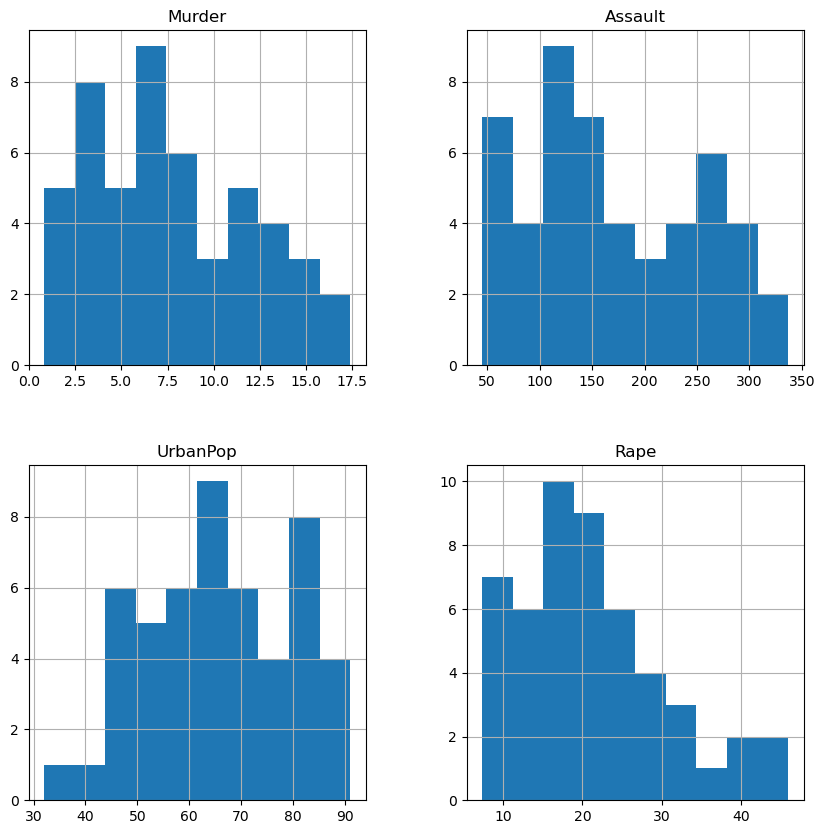

In [20]:
df.hist(figsize=(10,10))

In [22]:
kmeans = KMeans(n_clusters = 4)

In [24]:
kmeans

KMeans(n_clusters=4)

In [26]:
k_fit = kmeans.fit(df)

In [30]:
k_fit.n_clusters

4

In [32]:
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [34]:
k_fit.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2], dtype=int32)

# Kümelerin Görsellestirilmesi

In [37]:
k_means = KMeans(n_clusters=2).fit(df)

In [39]:
kumeler = k_means.labels_

In [41]:
kumeler

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

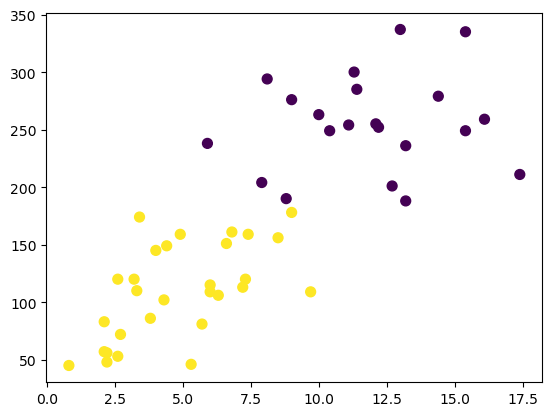

In [43]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c = kumeler, s= 50 , cmap = "viridis")
#iloc pozisyon ile (0,1,2,3) loc ise  İsimle erişmek istiyorsan df.loc[:, "Murder"] Tüm satırların 'Murder' sütunu

In [45]:
merkezler = k_means.cluster_centers_

In [47]:
merkezler

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

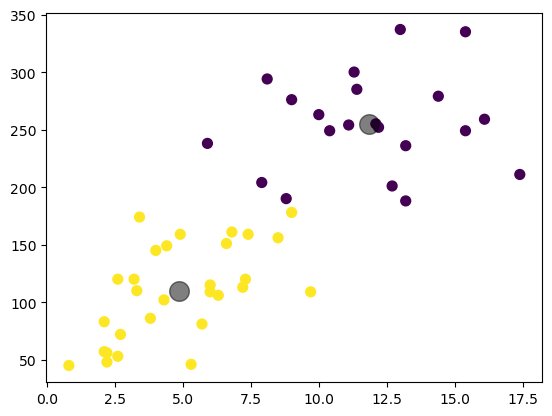

In [53]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c = kumeler, s= 50 , cmap = "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c= "black",s= 200 , alpha = 0.5);

# Elbow Yöntemi

In [56]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [68]:
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_) # kmeans.inertia_ = Kümeleme sonucunda oluşan tüm noktaların, kendi kümelerinin merkezine olan kareli uzaklıklarının toplamıdır.

Text(0.5, 1.0, 'Optimum Kume sayisi icin Elbow Yontemi')

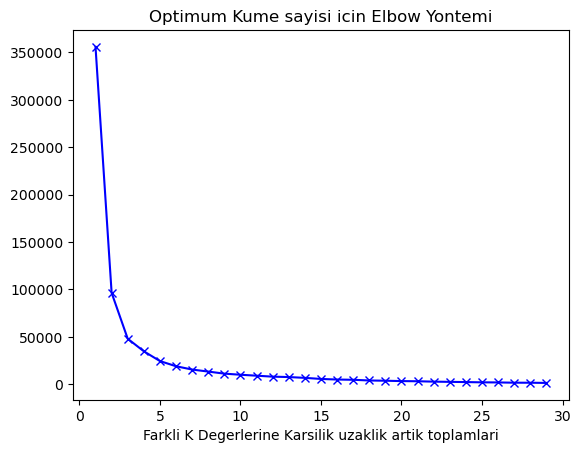

In [60]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farkli K Degerlerine Karsilik uzaklik artik toplamlari")
plt.title("Optimum Kume sayisi icin Elbow Yontemi")

In [62]:
!pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.7 MB/s eta 0:00:00a 0:00:01m


In [64]:
from yellowbrick.cluster import KElbowVisualizer

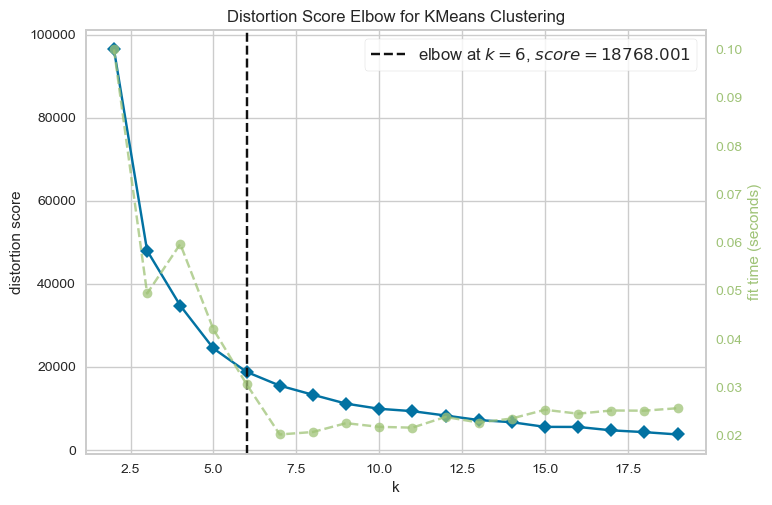

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans,k=(2,20))
visu.fit(df)
visu.poof()

In [70]:
kmeans = KMeans(n_clusters = 4).fit(df)
kmeans

KMeans(n_clusters=4)

In [72]:
kumeler = kmeans.labels_

In [74]:
pd.DataFrame({"States":df.index,"Kumeler":kumeler})

,States,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,3
4,California,0
5,Colorado,3
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,3


In [76]:
df["Kume_no"] = kumeler

In [78]:
df

,Murder,Assault,UrbanPop,Rape,Kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,3


# Hierarchical Cluster Analysis

K-Means yonteminde sadece belirli sayida kumeye ayirabiliyoruz

Hiyerarsik kumeleme de ise hem belirli bir sayida hem de olusan yeni bir kumelerin altinda da yeni kumelere ayirabiliriz

In [86]:
from scipy.cluster.hierarchy import linkage

In [88]:
hc_complete = linkage(df,"complete")
hc_average = linkage(df,"average")

In [90]:
from scipy.cluster.hierarchy import dendrogram

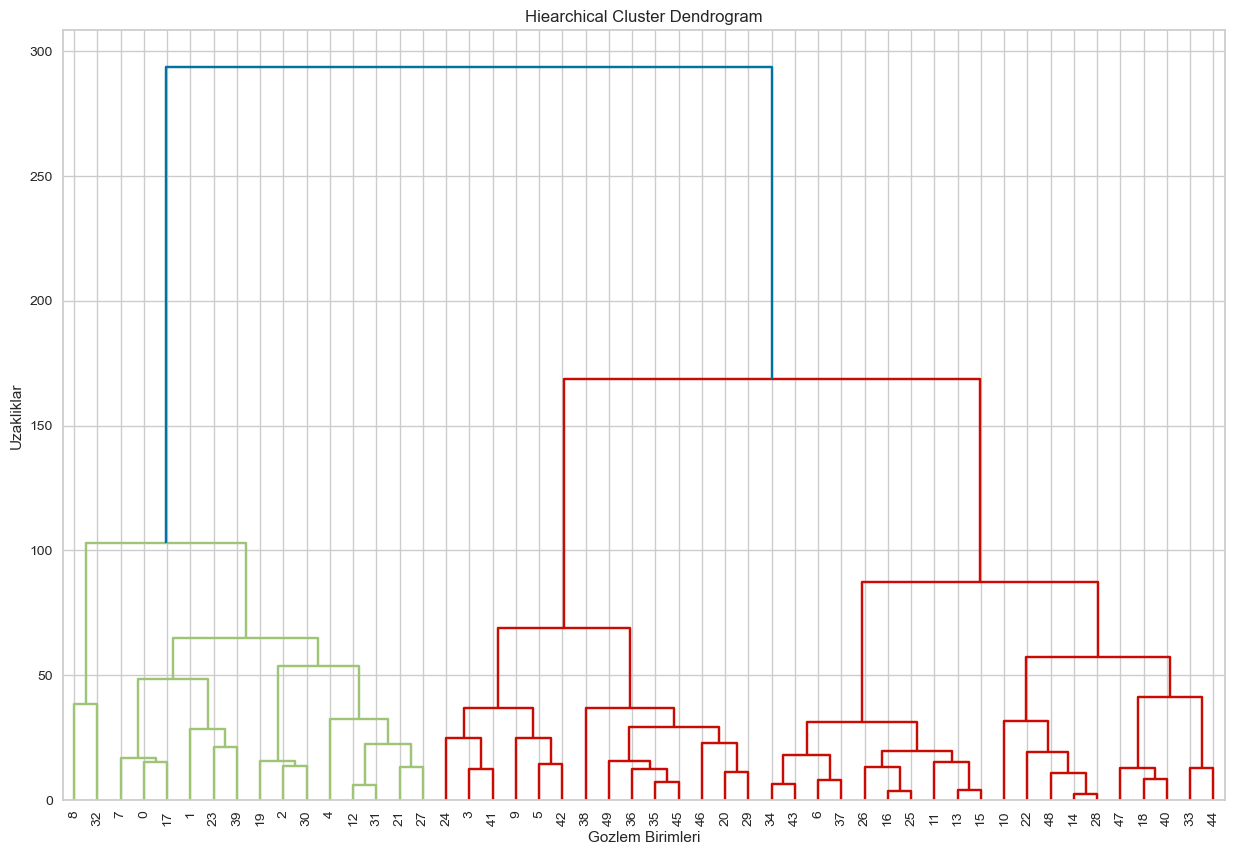

In [94]:
plt.figure(figsize = (15,10))
plt.title("Hiearchical Cluster Dendrogram")
plt.xlabel("Gozlem Birimleri")
plt.ylabel("Uzakliklar")
dendrogram(hc_complete,
          leaf_font_size = 10);

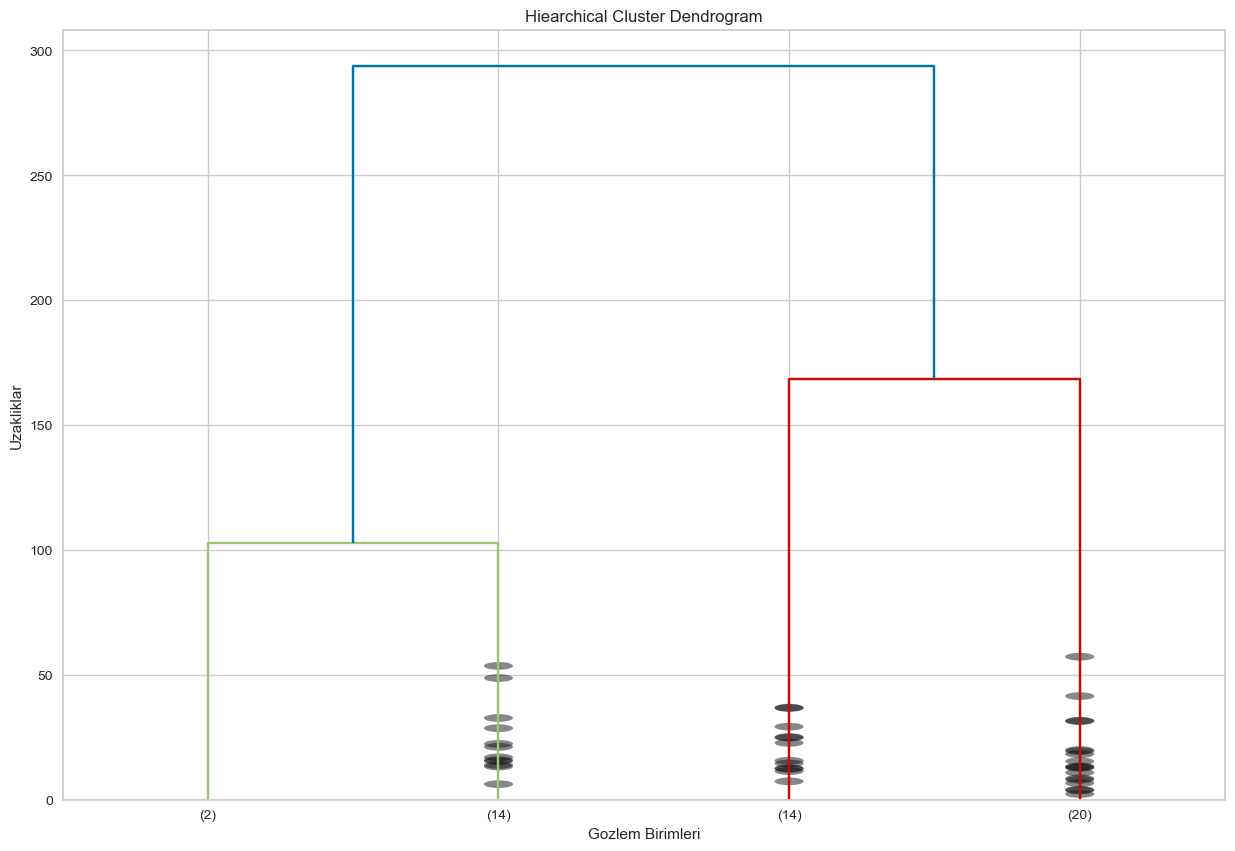

In [96]:
plt.figure(figsize = (15,10))
plt.title("Hiearchical Cluster Dendrogram")
plt.xlabel("Gozlem Birimleri")
plt.ylabel("Uzakliklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p=4,
           show_contracted = True,
          leaf_font_size = 10);

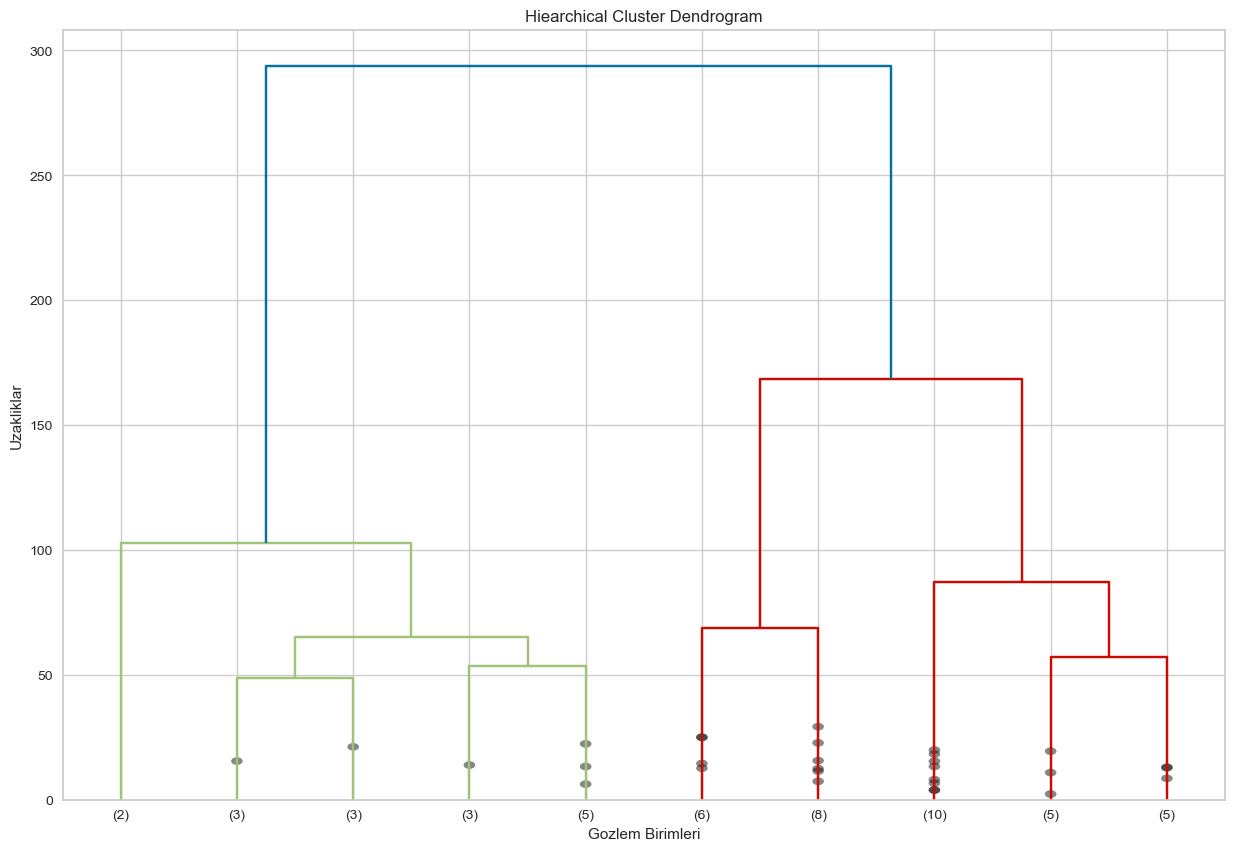

In [98]:
plt.figure(figsize = (15,10))
plt.title("Hiearchical Cluster Dendrogram")
plt.xlabel("Gozlem Birimleri")
plt.ylabel("Uzakliklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p=10,
           show_contracted = True,
          leaf_font_size = 10);

# Principal Component Analysis

Temel fikir cok degiskenli verinin ana ozelliklerini daha az sayida degisken ile temsil etmek

In [102]:
df = pd.read_csv("Hitters.csv")
df.dropna(inplace=True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [104]:
from sklearn.preprocessing import StandardScaler

In [106]:
df = StandardScaler().fit_transform(df)

In [108]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [110]:
from sklearn.decomposition import PCA

In [112]:
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df)

In [114]:
bilesen_df = pd.DataFrame(data= pca_fit , columns = ["birinci_bilesen","ikinci_bilesen"])

In [116]:
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [118]:
pca.explained_variance_ratio_ #veri setinin % kaci aciklaniyo (birinci bilesenin %45i mesela)

array([0.45245466, 0.24246801])

In [120]:
pca.components_

array([[ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
         0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
         0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
        -0.00529271,  0.24914187],
       [-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
        -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
         0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
        -0.20978299, -0.05452611]])

In [122]:
pca.components_[1]

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

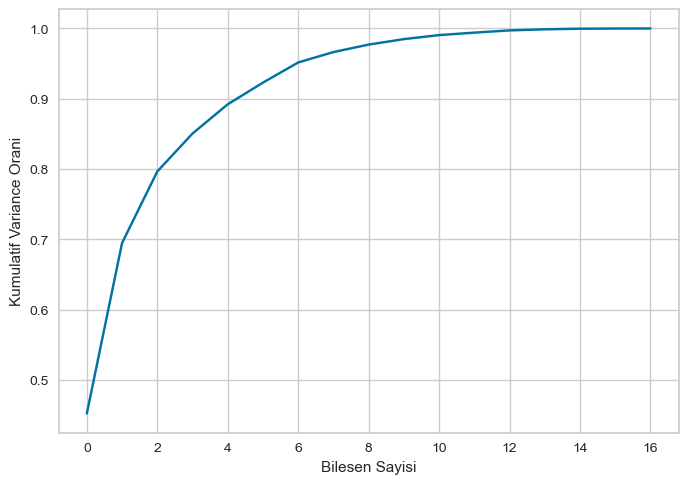

In [126]:
#optimum bilesen sayisi
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bilesen Sayisi")
plt.ylabel("Kumulatif Variance Orani");

In [128]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

In [130]:
#Final
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [132]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])